# immo_eliza data analysis
I. Data cleaning
  1. Importing necessary libraries and Loading the dataset
  2. Explorint the dataset and renaming the headers
  3. Converting booleans to 1 and 0
  4. checking and removing duplication 
  5. check and remove  duplication 
  6. cleaning in the "Price" column  
  7.  Removing columns with many NaN and have no significant impact
  8. cleaning bedroomCount column 
  9. cleaning province,region and locality column
  10. cleaning HasBalcony and HasGarden column
  11. categorizing data
   *  categroizing kitchen types   
   *  catgorizing construction year    

  
  12. Removing outliers 
  13. cleaning floor columns

II. Analyzing and visualizing the data
1. Questions
  * what is the average cost of house and apartment in Belgium?
  * What is the average cost of house and apartment in Ghent?
  * which (region,province,locality) is cheapest|expensive?
  * what is the correlation?
    * between price and bedroomcount
    * between price and facadecount
    * between price and floor
    * between price and constructionyear
  

In [246]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 17px;
</style>

## 1. Importing necessary Libraries and Loading the dataset

In [247]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
df = pd.read_csv('data/data_3.csv')

In [249]:
# save to csv file data.csv
df.to_csv('data/data.csv', header=False, index=False)

# 2. Exploring the dataset and renaming the headers

In [250]:
initial_size = df.shape
initial_size

(21047, 35)

In [251]:
df.head()


,ID,Type,Sub type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,...,FacadeCount,HasLift,FloodZoneType,HeatingType,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,KitchekType,LivingRoomArea
0,10128188,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,347.0,NaN,NaN
1,10128189,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,347.0,NaN,NaN
2,10128190,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,346.0,NaN,NaN
3,10128191,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,346.0,NaN,NaN
4,10128192,HOUSE,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,4.0,NaN,NaN,NaN,True,NaN,True,589.0,NaN,NaN


In [252]:
df.columns

Index(['ID', 'Type', 'Sub type', 'Price', 'NetHabitableSurface(msq)',
       'BedroomCount', 'Province', 'locality', 'Region', 'PostCode', 'street',
       'Floor', 'RegionCode', 'IsIsolated', 'HasSeaView', 'SchoolDistance',
       'ShopDistance', 'TransportDistance', 'NetHabitableSurface',
       'TotalRoomCount', 'HasAttic', 'HasBasement', 'HasDiningRoom',
       'BuildingCondition', 'ConstructionYear', 'FacadeCount', 'HasLift',
       'FloodZoneType', 'HeatingType', 'IsDoubleGlaze', 'HasBalcony',
       'HasGarden', 'GardenArea', 'KitchekType', 'LivingRoomArea'],
      dtype='object')

In [253]:
# renaming the header of the data
df = df.rename(columns={"KitchekType":"KitchenType","Sub type":"SubType","street":"Street","locality":"Locality"})

## 3. Converting booleans to 1 and 0

In [254]:
# convert boolean false and True to o and 1
df.replace({False: 0, True: 1}, inplace=True)
df.head()

,ID,Type,SubType,Price,NetHabitableSurface(msq),BedroomCount,Province,Locality,Region,PostCode,...,FacadeCount,HasLift,FloodZoneType,HeatingType,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,KitchenType,LivingRoomArea
0,10128188,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,347.0,NaN,NaN
1,10128189,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,347.0,NaN,NaN
2,10128190,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,346.0,NaN,NaN
3,10128191,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,346.0,NaN,NaN
4,10128192,HOUSE,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,4.0,NaN,NaN,NaN,1.0,NaN,1.0,589.0,NaN,NaN


## 5.  check and remove  duplication 


In [255]:
# check if the ID column is unique
df['ID'].is_unique


False

In [256]:
# finding the deplicated rows(with same ID Number)
from os import dup
duplicateRows = df[df.duplicated('ID')]
print(duplicateRows.shape)
duplicateRows.head()

(1379, 35)


,ID,Type,SubType,Price,NetHabitableSurface(msq),BedroomCount,Province,Locality,Region,PostCode,...,FacadeCount,HasLift,FloodZoneType,HeatingType,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,KitchenType,LivingRoomArea
12602,10151467,APARTMENT,APARTMENT,235000.0,90.0,2.0,Antwerp,Mortsel,Flanders,2640,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
12603,10151468,HOUSE,HOUSE,320000.0,161.0,2.0,West Flanders,Oostkamp,Flanders,8020,...,NaN,NaN,NON_FLOOD_ZONE,GAS,NaN,NaN,NaN,NaN,NaN,NaN
12604,10151472,HOUSE,HOUSE,184000.0,181.0,2.0,Limburg,Genk,Flanders,3600,...,NaN,NaN,NON_FLOOD_ZONE,NaN,NaN,NaN,1.0,NaN,NaN,NaN
12605,10151474,HOUSE,HOUSE,200000.0,130.0,3.0,Antwerp,Westerlo,Flanders,2260,...,NaN,NaN,NON_FLOOD_ZONE,GAS,1.0,NaN,1.0,NaN,NaN,NaN
12606,10151476,HOUSE,HOUSE,482000.0,151.0,3.0,Flemish Brabant,Dilbeek,Flanders,1700,...,NaN,NaN,NON_FLOOD_ZONE,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [257]:
df = df.drop_duplicates()

In [258]:
size_after_removing_duplicates = df.shape
removed_duplicates = initial_size[0] - size_after_removing_duplicates[0]
print(f'{removed_duplicates} rows are duplicates and removed')
print(size_after_removing_duplicates)


1379 rows are duplicates and removed
(19668, 35)


In [259]:
df["ID"].describe()

count    1.966800e+04
mean     1.014858e+07
std      1.189163e+04
min      1.012819e+07
25%      1.013843e+07
50%      1.014825e+07
75%      1.015789e+07
max      1.016892e+07
Name: ID, dtype: float64

In [260]:
# Replace empty cells of the "Price" column by NaN
df['Price'].replace('', np.nan, inplace=True)
df.head(20)

,ID,Type,SubType,Price,NetHabitableSurface(msq),BedroomCount,Province,Locality,Region,PostCode,...,FacadeCount,HasLift,FloodZoneType,HeatingType,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,KitchenType,LivingRoomArea
0,10128188,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,347.0,NaN,NaN
1,10128189,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,347.0,NaN,NaN
2,10128190,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,346.0,NaN,NaN
3,10128191,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,346.0,NaN,NaN
4,10128192,HOUSE,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,4.0,NaN,NaN,NaN,1.0,NaN,1.0,589.0,NaN,NaN
5,10128193,HOUSE,HOUSE,1295000.0,650.0,5.0,Antwerp,Berlaar,Flanders,2590,...,3.0,NaN,NON_FLOOD_ZONE,GAS,1.0,NaN,NaN,NaN,INSTALLED,NaN
6,10128195,HOUSE,HOUSE,442000.0,221.0,4.0,Antwerp,Merksplas,Flanders,2330,...,4.0,NaN,NaN,ELECTRIC,NaN,NaN,NaN,NaN,NaN,NaN
7,10128196,HOUSE,MIXED_USE_BUILDING,590000.0,1100.0,3.0,Liège,Liege,Wallonie,4020,...,3.0,NaN,NaN,GAS,1.0,NaN,NaN,NaN,HYPER_EQUIPPED,18.0
8,10128197,APARTMENT,APARTMENT,249000.0,145.0,2.0,Liège,Flemalle,Wallonie,4400,...,3.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
9,10128198,APARTMENT,PENTHOUSE,249000.0,135.0,2.0,Liège,Flemalle,Wallonie,4400,...,3.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


## 6. cleaning in the "Price" column 

In [261]:
# drop the rows for those with empty price
df.dropna(subset=['Price'], inplace=True)
df.shape

(18211, 35)

In [262]:
print(f'{size_after_removing_duplicates[0]-df.shape[0]} of {initial_size[0]}  data collected has no price' )
print(f' Now we have data for {df.shape[0]}  proprties in Belgium ')

1457 of 21047  data collected has no price
 Now we have data for 18211  proprties in Belgium 


In [263]:
# to be deleted
df["HasBalcony"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: HasBalcony, dtype: float64

In [264]:
df.describe()

,ID,Price,NetHabitableSurface(msq),BedroomCount,Floor,HasSeaView,SchoolDistance,ShopDistance,TransportDistance,NetHabitableSurface,...,HasBasement,HasDiningRoom,ConstructionYear,FacadeCount,HasLift,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,LivingRoomArea
count,1.821100e+04,1.821100e+04,15550.000000,17810.000000,5277.000000,12.0,14458.000000,14458.000000,14458.000000,15550.000000,...,7254.0,3099.0,10277.000000,12258.000000,4326.0,11814.0,0.0,5935.0,3520.000000,5811.000000
mean,1.014851e+07,3.958509e+05,163.420900,3.050646,3.149896,1.0,107.950339,100.495020,26.413266,163.420900,...,1.0,1.0,1981.681425,2.777125,1.0,1.0,NaN,1.0,641.649716,14.961452
std,1.194431e+04,4.070204e+05,193.691889,14.453556,19.777805,0.0,368.895605,602.382276,123.721231,193.691889,...,0.0,0.0,88.244062,0.866607,0.0,0.0,NaN,0.0,3047.464076,43.223104
min,1.012819e+07,1.385000e+03,11.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,11.000000,...,1.0,1.0,1753.000000,1.000000,1.0,1.0,NaN,1.0,1.000000,1.000000
25%,1.013834e+07,2.300000e+05,94.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,94.000000,...,1.0,1.0,1960.000000,2.000000,1.0,1.0,NaN,1.0,60.000000,9.000000
50%,1.014813e+07,3.150000e+05,134.000000,3.000000,2.000000,1.0,0.000000,0.000000,0.000000,134.000000,...,1.0,1.0,1983.000000,3.000000,1.0,1.0,NaN,1.0,160.000000,12.000000
75%,1.015795e+07,4.438875e+05,190.750000,3.000000,3.000000,1.0,0.000000,0.000000,0.000000,190.750000,...,1.0,1.0,2020.000000,4.000000,1.0,1.0,NaN,1.0,500.000000,16.000000
max,1.016892e+07,2.965000e+07,17842.000000,1919.000000,999.000000,1.0,9000.000000,15000.000000,3700.000000,17842.000000,...,1.0,1.0,9999.000000,8.000000,1.0,1.0,NaN,1.0,87000.000000,2153.000000


## 7.  Removing columns with many NaN and have no significant impact

In [265]:
# check the nan values again
df.isna().sum()

ID                              0
Type                            0
SubType                         0
Price                           0
NetHabitableSurface(msq)     2661
BedroomCount                  401
Province                      697
Locality                        0
Region                        697
PostCode                        0
Street                       3839
Floor                       12934
RegionCode                    697
IsIsolated                  12689
HasSeaView                  18199
SchoolDistance               3753
ShopDistance                 3753
TransportDistance            3753
NetHabitableSurface          2661
TotalRoomCount              16985
HasAttic                    15733
HasBasement                 10957
HasDiningRoom               15112
BuildingCondition            5977
ConstructionYear             7934
FacadeCount                  5953
HasLift                     13885
FloodZoneType                8526
HeatingType                  6722
IsDoubleGlaze 

In [266]:
df = df.drop(['NetHabitableSurface(msq)','HasSeaView', 'SchoolDistance',\
       'ShopDistance', 'TransportDistance','TotalRoomCount', 'HasAttic','IsIsolated',\
       'HasBasement', 'HasDiningRoom', 'HasLift','FloodZoneType', 'HeatingType', 'IsDoubleGlaze',\
       'LivingRoomArea', 'GardenArea'], axis=1)

In [267]:
df.columns

Index(['ID', 'Type', 'SubType', 'Price', 'BedroomCount', 'Province',
       'Locality', 'Region', 'PostCode', 'Street', 'Floor', 'RegionCode',
       'NetHabitableSurface', 'BuildingCondition', 'ConstructionYear',
       'FacadeCount', 'HasBalcony', 'HasGarden', 'KitchenType'],
      dtype='object')

## 8. cleaning bedroomCount column 

In [268]:
# first check the number of NaN value
df['BedroomCount'].isna().sum()

401

In [269]:
df['BedroomCount'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
21042    False
21043    False
21044    False
21045    False
21046    False
Name: BedroomCount, Length: 18211, dtype: bool

In [270]:
# get the mean of the bedroom count for subtypes
#df.groupby(["Type","Sub type"])["BedroomCount"].mean().round()


In [271]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            21037, 21038, 21039, 21040, 21041, 21042, 21043, 21044, 21045,
            21046],
           dtype='int64', length=18211)

In [272]:
bedroom_count_mean = {"APARTMENT":2.0,"DUPLEX": 2.0,"FLAT_STUDIO": 1.0,"GROUND_FLOOR" :2,"KOT":1.0,"LOFT": 3.0,
"PENTHOUSE": 3,"SERVICE_FLAT": 1, "PENTHOUSE": 3.0,"SERVICE_FLAT":1.0,"TRIPLEX":3.0,"APARTMENT_BLOCK":7.0,
    "BUNGALOW":3.0,"CASTLE": 9.0, "CHALET ":3.0,"COUNTRY_COTTAGE":6,"EXCEPTIONAL_PROPERTY":5,"FARMHOUSE":5,
           "MANOR_HOUSE":6,"MANSION":5,"MIXED_USE_BUILDING":5.0,'OTHER_PROPERTY':7.0,'TOWN_HOUSE':3.0,"VILLA":3.0}
           
           

In [273]:
#lets first convert nan value to 0
#df['BedroomCount'] = df['BedroomCount'].fillna(0)

In [274]:
#df["BedroomCount"] = np.where((df['BedroomCount']==0) &(d), new_value, “column_name2”) 

In [275]:
# # not completed ,,,,,, need to work on it
# # to save time just decided to delete the 400 NaN value of bedroomCount


# # replace nan value of bedroom count using the bedroom_count_mean dictionary
# for index, row in df.iterrows():
#     #print(df[df["ID"]==row["ID"]])
#     print(row["ID"])
#     sub_type = row['SubType']
    
#     # check if bedcount is null
#     if (df.loc[(df['ID'] == row['ID']), 'BedroomCount'] == 0).ir:
#       print('yes')
    
#     # replace value from the dic
    

    

In [276]:
df.dropna(subset=['BedroomCount'], inplace=True)
df.shape

(17810, 19)

In [277]:
df.columns

Index(['ID', 'Type', 'SubType', 'Price', 'BedroomCount', 'Province',
       'Locality', 'Region', 'PostCode', 'Street', 'Floor', 'RegionCode',
       'NetHabitableSurface', 'BuildingCondition', 'ConstructionYear',
       'FacadeCount', 'HasBalcony', 'HasGarden', 'KitchenType'],
      dtype='object')

## 9. cleaning province,region and locality 


Belgium is made up of three regions, each having considerable autonomy. The Walloon Region is the largest, followed by Flemish Region. The Brussels Capital Region is the smallest.

In [278]:
df["PostCode"].isna().sum()

0

In [279]:

print("number of rows with nan values for Region: ",df['Region'].isna().sum())
print("number of rows with nan values for Province: ",df['Province'].isna().sum())
print("number of rows with nan values for Locality: ",df['Locality'].isna().sum())
print('number of rows with nan values for postcode: ',df['PostCode'].isna().sum())

number of rows with nan values for Region:  669
number of rows with nan values for Province:  669
number of rows with nan values for Locality:  0
number of rows with nan values for postcode:  0


In [280]:

print('Regions in Belgium: ',df['Region'].unique())
print("Provinces in Belgium: ",df["Province"].unique())
print("Locality in Belgium: ",df["Locality"].unique())


Regions in Belgium:  ['Flanders' 'Wallonie' 'Brussels' nan]
Provinces in Belgium:  ['Limburg' 'Antwerp' 'Liège' 'Brussels' 'East Flanders' 'Namur' nan
 'Flemish Brabant' 'Hainaut' 'West Flanders' 'Walloon Brabant'
 'Luxembourg']
Locality in Belgium:  ['Zonhoven' 'Berlaar' 'Merksplas' ... 'Erpe' 'Gijzelbrechtegem' 'Beerst']


In [281]:
df.dropna(subset=['Region','Province'], inplace=True)

## 10. HasBalcony and HasGarden 
for HasBalcony& HasGarden convert boolean(T/F) -----> 0/1


In [282]:
df.HasBalcony = df.HasBalcony.replace({True: 1, False: 0})
df.HasGarden = df.HasGarden.replace({True:1,False:0})

In [283]:
df[['HasBalcony', 'HasGarden']] = df[['HasBalcony', 'HasGarden']].fillna(0) 

In [284]:
df["HasGarden"].value_counts()

0.0    11436
1.0     5705
Name: HasGarden, dtype: int64

## 11. categorizing data  

categroizing kitchen types   ### 11.1        

In [285]:
df.columns

Index(['ID', 'Type', 'SubType', 'Price', 'BedroomCount', 'Province',
       'Locality', 'Region', 'PostCode', 'Street', 'Floor', 'RegionCode',
       'NetHabitableSurface', 'BuildingCondition', 'ConstructionYear',
       'FacadeCount', 'HasBalcony', 'HasGarden', 'KitchenType'],
      dtype='object')

In [286]:
df['KitchenType'].value_counts()



INSTALLED             5425
HYPER_EQUIPPED        2071
SEMI_EQUIPPED         1338
USA_HYPER_EQUIPPED     950
NOT_INSTALLED          614
USA_INSTALLED          366
USA_SEMI_EQUIPPED       83
USA_UNINSTALLED          5
Name: KitchenType, dtype: int64

maping values to  labels
NOT_INSTALLED  --- 0
USA_UNINSTALLE --- 0
INSTALLED -------- 1
USA_INSTALLED ---- 1
SEMI_EQUIPPED ---- 2
USA_SEMI_EQUIPPED  2             
HYPER_EQUIPPED     3  
missed value ----- 0

In [287]:
df['KitchenType'].isnull()


0         True
1         True
2         True
3         True
4         True
         ...  
21042    False
21043     True
21044    False
21045     True
21046     True
Name: KitchenType, Length: 17141, dtype: bool

In [288]:
df.loc[df['KitchenType'] == "NOT_INSTALLED", 'KitchenType'] = 0
df.loc[df['KitchenType'] == "USA_UNINSTALLED", 'KitchenType'] = 0
df.loc[df['KitchenType'] == "INSTALLED", 'KitchenType'] = 1
df.loc[df['KitchenType'] == "USA_INSTALLED", 'KitchenType'] = 1
df.loc[df['KitchenType'] == "SEMI_EQUIPPED", 'KitchenType'] = 2
df.loc[df['KitchenType'] == "USA_SEMI_EQUIPPED", 'KitchenType'] = 2
df.loc[df['KitchenType'] == "HYPER_EQUIPPED", 'KitchenType'] = 3
df.loc[df['KitchenType'] == "USA_HYPER_EQUIPPED", 'KitchenType'] = 3
df.loc[df['KitchenType'].isna(), 'KitchenType'] = 0

In [289]:
df['KitchenType'].value_counts()

0    6908
1    5791
3    3021
2    1421
Name: KitchenType, dtype: int64

### 11.2  catgorizing construction year    
catgorizing data for construction year
house built: before 2000 --> old = 0,after 2000 --> new = 1,  missing is --> old = 0


In [290]:


df.loc[df["ConstructionYear"] < 2000, "ConstructionYear"] = 0
df.loc[df["ConstructionYear"] >=2000, "ConstructionYear"] = 1

#df.loc[df["ConstructionYear"].isna(), "ConstructionYear"] = 2



In [291]:
df['ConstructionYear'].value_counts()

0.0    5864
1.0    3892
Name: ConstructionYear, dtype: int64

## 12 Removing outliers 
1. checking  and removing outlier for price
2. checking and removing outlier for bedroomCount
3. checking and removing outlier for facadecount

1. checking  and removing outlier for price

In [292]:
df["Price"].describe()

count    1.714100e+04
mean     3.922536e+05
std      3.281301e+05
min      1.385000e+03
25%      2.350000e+05
50%      3.190000e+05
75%      4.400000e+05
max      8.100000e+06
Name: Price, dtype: float64

In [293]:
df = df[df['Price'] > 50000]
df.shape

(17083, 19)

In [294]:
df['Price'].describe()

count    1.708300e+04
mean     3.934492e+05
std      3.280427e+05
min      5.200000e+04
25%      2.350000e+05
50%      3.190000e+05
75%      4.403500e+05
max      8.100000e+06
Name: Price, dtype: float64

In [295]:
import seaborn as sns
from scipy import stats

<AxesSubplot:title={'center':'price scatter diagram'}, xlabel='ID', ylabel='Price'>

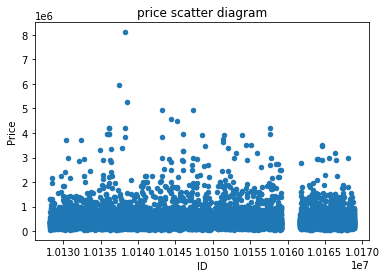

In [296]:
df.plot.scatter(x='ID', y='Price', title= 'price scatter diagram')

<AxesSubplot:xlabel='Price'>

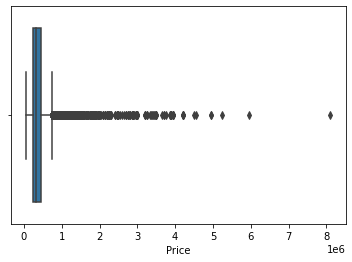

In [297]:
# checking outliers for price
sns.boxplot(x=df['Price'])


# Standard deviation
Standard deviation is the measure of how far a data point lies from the mean value. Generally, it is common practice to use 3 standard deviations for the detection and removal of outliers.

In [298]:
upper_limit = 0
lower_limit = 0
print('#########Starting ############')
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit


def call_outlier_removal(upper_limit,lower_limit,variable,df):
    print(f" ***** removing outlier for {variable} column  ****")
    # df =df
    # variable = variable
    upper_limit, lower_limit = outlier_removal(df, variable)


    
    i_upper_limit = upper_limit
    i_lower_limit = lower_limit
    print('i_upper_limit',upper_limit)
    print('i_lower_limit: ',lower_limit)
    
    
    while(True):
        df = df[(df[variable]> lower_limit)& (df[variable]<upper_limit)]
        upper_limit,lower_limit = outlier_removal(df,variable)
        if (upper_limit - i_upper_limit)== 0 and (lower_limit - i_lower_limit)==0:
            df = df[(df[variable]> lower_limit)& (df[variable]<upper_limit)]
            print("#upper_limit: ",upper_limit)
            print("#lower_limit: ",lower_limit)
            break
        i_lower_limit = lower_limit
        i_upper_limit = upper_limit
    return df


#########Starting ############


In [299]:
df.shape

(17083, 19)

In [300]:
df =call_outlier_removal(upper_limit,lower_limit,'Price',df)

 ***** removing outlier for Price column  ****
i_upper_limit 1377577.2850278318
i_lower_limit:  -590678.8481022334
#upper_limit:  753699.5740706618
#lower_limit:  -93830.58745089936


In [301]:
df.shape

(15919, 19)

<AxesSubplot:xlabel='Price'>

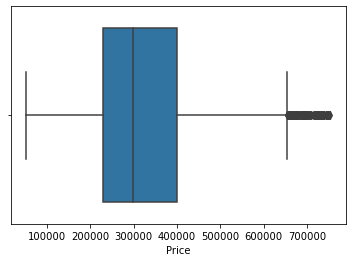

In [302]:
sns.boxplot(x=df['Price'])

In [303]:
df["Price"].describe()

count     15919.00000
mean     329934.49331
std      141255.02692
min       52000.00000
25%      229325.00000
50%      299500.00000
75%      399000.00000
max      753350.00000
Name: Price, dtype: float64

# InterQuartile Range:
interquartile range is a difference between the third quartile(Q3) and the first quartile(Q1). In this method, anything lying above  Q3 + 1.5 * IQR and Q1 – 1.5 * IQR  is considered an outlier.

<!-- def outliers(df, feature):
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df, "Price")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower) -->

2. checking and removing outlier for bedroomCount

In [304]:
df['BedroomCount'].describe()

count    15919.000000
mean         2.920912
std         15.237710
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max       1919.000000
Name: BedroomCount, dtype: float64

<AxesSubplot:title={'center':'bedroomcount scatter diagram'}, xlabel='ID', ylabel='BedroomCount'>

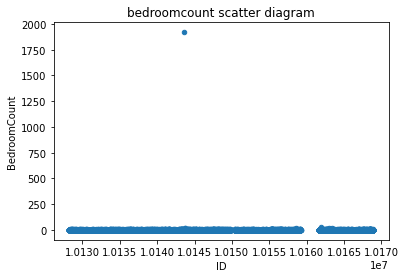

In [305]:
df.plot.scatter(x='ID', y='BedroomCount', title= 'bedroomcount scatter diagram')

<AxesSubplot:xlabel='BedroomCount'>

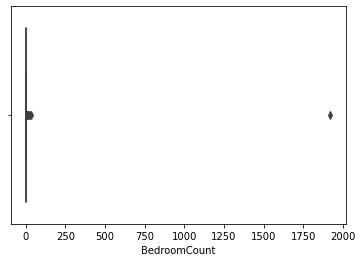

In [306]:
sns.boxplot(x=df['BedroomCount'])

In [307]:
df = call_outlier_removal(upper_limit,lower_limit,'BedroomCount',df)

 ***** removing outlier for BedroomCount column  ****
i_upper_limit 48.63404169549958
i_lower_limit:  -42.792217460308926
#upper_limit:  5.675555470648827
#lower_limit:  -0.29004747683758403


In [308]:

df["BedroomCount"].describe()

count    15512.000000
mean         2.692754
std          0.994267
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: BedroomCount, dtype: float64

<AxesSubplot:xlabel='BedroomCount'>

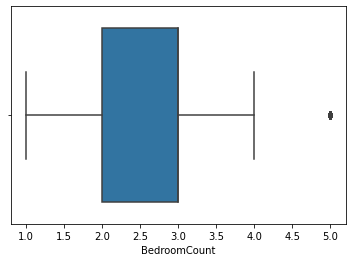

In [309]:
sns.boxplot(x=df['BedroomCount'])


3. checking and removing outlier for facadecount

In [310]:
df.shape

(15512, 19)

In [311]:
print('null value sum: ', df["FacadeCount"].isna().sum())
print(df["FacadeCount"].describe())
print(df["FacadeCount"].value_counts())



null value sum:  4825
count    10687.000000
mean         2.742210
std          0.846478
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          8.000000
Name: FacadeCount, dtype: float64
2.0    5143
3.0    2767
4.0    2640
1.0     133
6.0       3
8.0       1
Name: FacadeCount, dtype: int64


In [312]:
# normally  a house has atleast....and clients stress out if their property has more. so if they have more than one 
# they tend to mention ---------> facacdcount = 0 for NaN
df['FacadeCount'] = df['FacadeCount'].fillna(1)



<AxesSubplot:title={'center':'FacadeCount scatter diagram'}, xlabel='ID', ylabel='FacadeCount'>

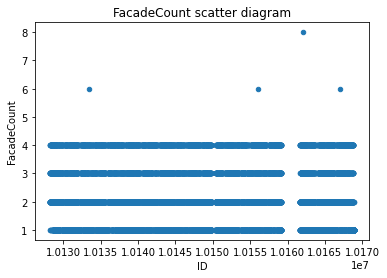

In [313]:
df.plot.scatter(x='ID', y='FacadeCount', title= 'FacadeCount scatter diagram')

<AxesSubplot:xlabel='FacadeCount'>

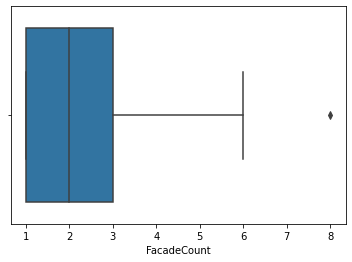

In [314]:
sns.boxplot(x=df['FacadeCount'])

In [315]:
df = call_outlier_removal(upper_limit,lower_limit,'FacadeCount',df)

 ***** removing outlier for FacadeCount column  ****
i_upper_limit 5.409223994346991
i_lower_limit:  -1.0086309051257434
#upper_limit:  5.4015616501703345
#lower_limit:  -1.003186617928911


<AxesSubplot:xlabel='FacadeCount'>

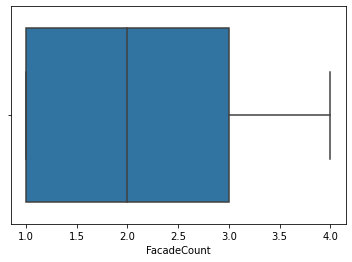

In [316]:
sns.boxplot(x=df['FacadeCount'])

In [317]:
df["FacadeCount"].unique()

array([3., 4., 2., 1.])

## 13. Cleaning floor columns

1. first check the unique floor numbers for apartment and house type of sales
  *  for house types the floor number should be all NaN
  *  for apartment it should be small positive integer
2. replace the NaN values of Floor number for the Apartment type of sales by mean value

In [318]:

print("unique values of floor number for type APARTMENT : ",df['Floor'].where(df['Type']== "APARTMENT").median())
print("unique values of floor number for type house: ",df['Floor'].where(df['Type']== "HOUSE").unique())
apartment_floor_median = df['Floor'].where(df['Type']== "APARTMENT").median()
print("median of  floor for apartments: ",apartment_floor_median)

unique values of floor number for type APARTMENT :  2.0
unique values of floor number for type house:  [nan]
median of  floor for apartments:  2.0


In [319]:
df["Floor"] = df['Floor'].where(df['Type']== "APARTMENT").fillna(apartment_floor_median)

# b. Data analysis and visualization

# 1. Questions
  * what is the average cost of house and apartment in Belgium?
  * What is the average cost of house and apartment in Ghent?
  * which (region,province,locality) is cheapest|expensive?
  * what is the correlation?
    * between price and bedroomcount
    * between price and facadecount
    * between price and floor
    * between price and constructionyear
  

What is the average cost of house and apartment in Belgium?

In [320]:
print("The average cost of House in Belgium is : ",int(df["Price"].where(df["Type"] == "HOUSE").mean()))
print("The average cost of Apartment in Belgium is: ",int(df["Price"].where(df["Type"]== "APARTMENT").mean()))

The average cost of House in Belgium is :  340890
The average cost of Apartment in Belgium is:  305990


What is the average cost of house and apartment in Ghent?

In [321]:
print("The average cost of Apartment in Ghent is : ",\
     df["Price"].where((df["Locality"] == "Gent")&(df["Type"] == "APARTMENT")).mean())
print("The average cost of House in Ghent is : ",\
     df["Price"].where((df["Locality"] == "Gent")&(df["Type"] == "HOUSE")).mean())

The average cost of Apartment in Ghent is :  365903.00492610835
The average cost of House in Ghent is :  402012.1875


Which province is cheapest|expensive?

In [322]:
df_apartment_groupedby_province = df.groupby(['Province','Type'])['Price'].mean().unstack()
df_apartment_groupedby_province.sort_values(by=['HOUSE','APARTMENT'], inplace=True, ascending=False)

type(df_apartment_groupedby_province)

pandas.core.frame.DataFrame

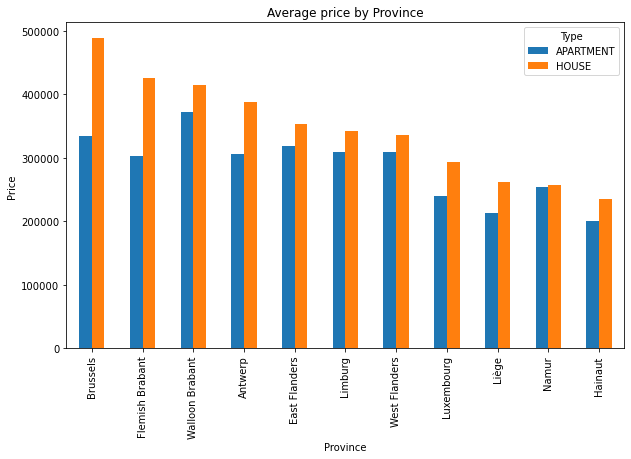

In [350]:
ax= df_apartment_groupedby_province.plot(kind='bar', title='Average price by Province',
               ylabel='Price', xlabel='Province', figsize=(10, 6))

ax.yaxis.set_units("Euro")

In which region it is more affordable to buy a house?

<AxesSubplot:title={'center':'Average price by Region'}, xlabel='Region', ylabel='Price in Euro'>

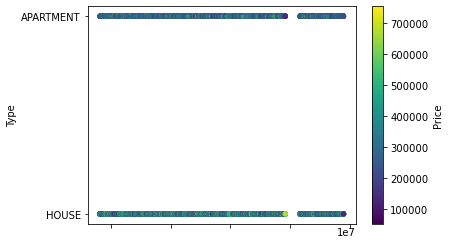

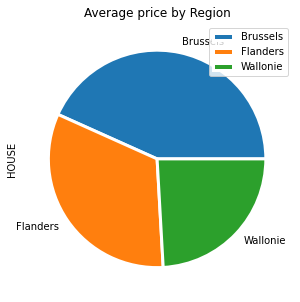

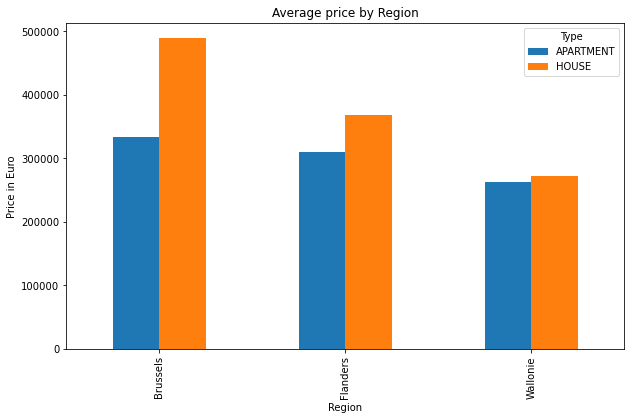

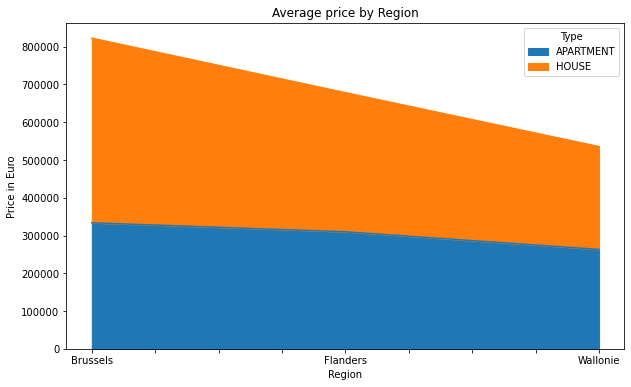

In [348]:
df.plot.scatter(x='ID',
                      y='Type',
                      c='Price',
                      colormap='viridis')
df.groupby(['Region','Type'])['Price'].mean().unstack().plot(kind = 'pie', y= "HOUSE",figsize = (5,5), title='Average price by Region',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
df.groupby(['Region','Type'])['Price'].mean().unstack().plot(kind='bar', title='Average price by Region',
               ylabel='Price in Euro', xlabel='Region', figsize=(10, 6))
df.groupby(['Region','Type'])['Price'].mean().unstack().plot(kind='area', title='Average price by Region',
               ylabel='Price in Euro', xlabel='Region', figsize=(10, 6))


In which locality in East flanders province, is the price for apartment|house the highest?

In [325]:
df.columns

Index(['ID', 'Type', 'SubType', 'Price', 'BedroomCount', 'Province',
       'Locality', 'Region', 'PostCode', 'Street', 'Floor', 'RegionCode',
       'NetHabitableSurface', 'BuildingCondition', 'ConstructionYear',
       'FacadeCount', 'HasBalcony', 'HasGarden', 'KitchenType'],
      dtype='object')

<AxesSubplot:title={'center':'Average price of East Flanders localities'}, xlabel='Locality', ylabel='Price in Euro'>

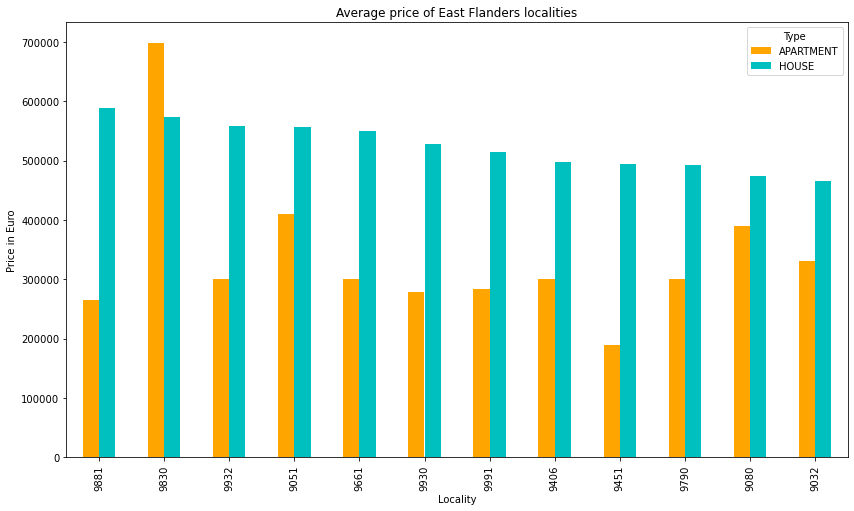

In [326]:
df1 = df.where(df['Province']=="East Flanders")

df2 = df1.groupby(['PostCode','Type'])['Price'].mean().unstack()

df2['APARTMENT'] = df2['APARTMENT'].fillna(int(df2['APARTMENT'].mean()))
df2['HOUSE'] = df2['HOUSE'].fillna(int(df2['HOUSE'].mean()))
df2.sort_values(by=['HOUSE','APARTMENT'], inplace=True, ascending=False)

df2.head(12).plot(kind='bar',color={"HOUSE": "c", "APARTMENT": "orange"},
title='Average price of East Flanders localities',ylabel='Price in Euro', xlabel='Locality', figsize=(14, 8))

<AxesSubplot:title={'center':'Average price of Brussels localities'}, ylabel='Locality'>

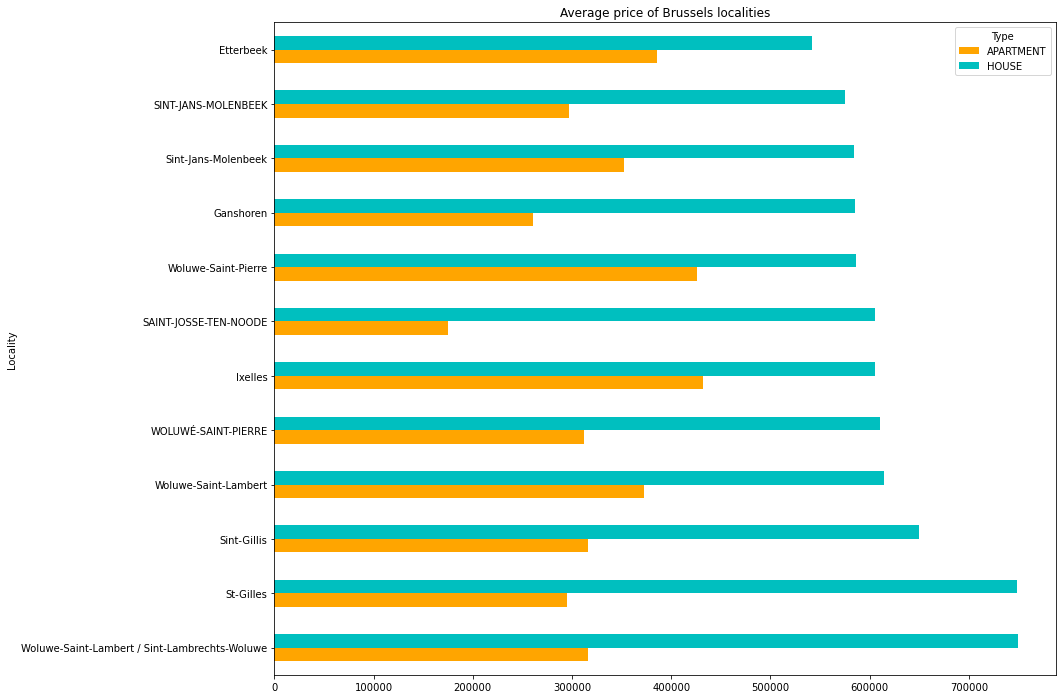

In [327]:
df1 = df.where(df['Province']=="Brussels")

df2 = df1.groupby(['Locality','Type'])['Price'].mean().unstack()

df2['APARTMENT'] = df2['APARTMENT'].fillna(int(df2['APARTMENT'].mean()))
df2['HOUSE'] = df2['HOUSE'].fillna(int(df2['HOUSE'].mean()))
df2.sort_values(by=['HOUSE','APARTMENT'], inplace=True, ascending=False)

df2.head(12).plot(kind='barh',color={"HOUSE": "c", "APARTMENT": "orange"},
title='Average price of Brussels localities',ylabel='Price in Euro', xlabel='Locality', figsize=(14, 12))

In [328]:
a= df[df['Province']== "Brussels"]
a.groupby('Locality')["Price"].value_counts()

Locality              Price   
ANDERLECHT            160000.0    1
                      185000.0    1
                      205000.0    1
                      220000.0    1
AUDERGHEM             390000.0    1
                                 ..
Woluwe-St-Pierre      445000.0    1
                      447500.0    1
Woluwe-saint-lambert  235000.0    1
                      375000.0    1
                      495000.0    1
Name: Price, Length: 1088, dtype: int64

In [329]:
df[df['Locality']=='Gand']

,ID,Type,SubType,Price,BedroomCount,Province,Locality,Region,PostCode,Street,Floor,RegionCode,NetHabitableSurface,BuildingCondition,ConstructionYear,FacadeCount,HasBalcony,HasGarden,KitchenType
6873,10142453,HOUSE,HOUSE,595000.0,4.0,East Flanders,Gand,Flanders,9032,Haagstuk,2.0,FLANDERS,200.0,AS_NEW,1.0,3.0,0.0,1.0,3


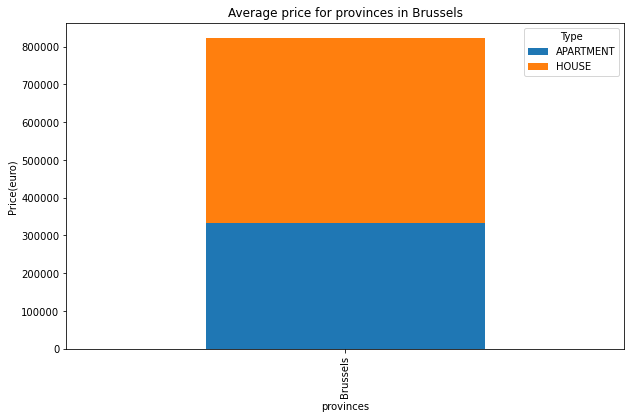

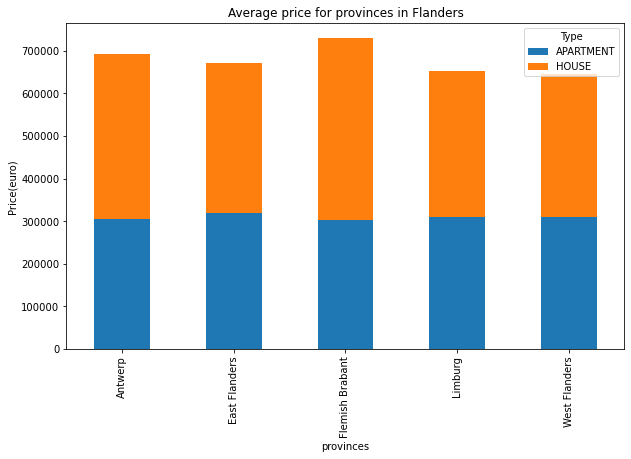

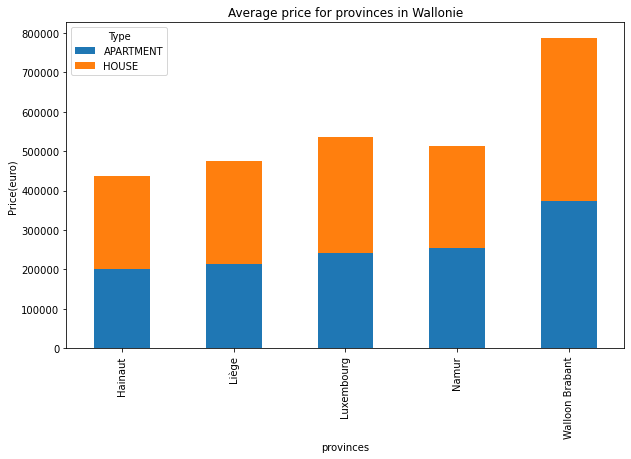

In [347]:

for region in df.groupby('Region').groups:
    df1 = df.where(df['Region']== region)
    df1.groupby(['Province','Type'])['Price'].mean().unstack().plot(kind='bar', title=f'Average price for provinces in {region}',
               ylabel='Price(euro)', xlabel='provinces', figsize=(10, 6),stacked =True)


How the number of bedrooms affect the price?


In [331]:
df["BedroomCount"].value_counts()

3.0    5679
2.0    5147
4.0    2361
1.0    1655
5.0     666
Name: BedroomCount, dtype: int64

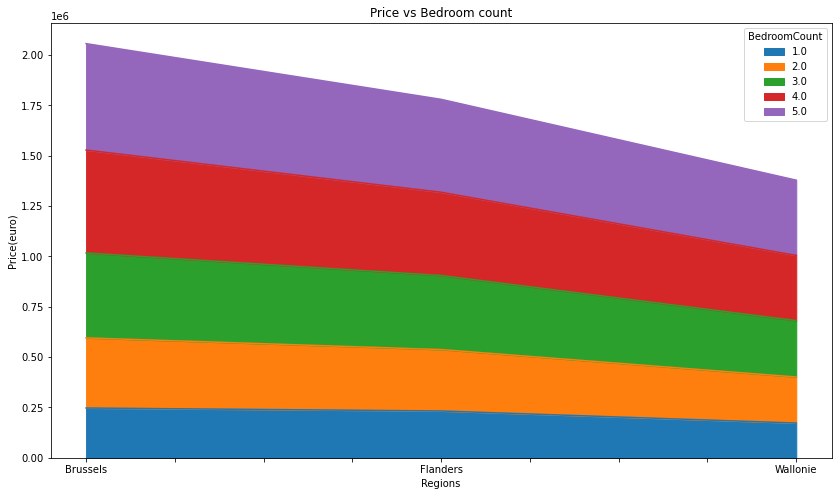

In [332]:

df_bedroom = df.groupby(['Region','BedroomCount'])['Price'].mean().unstack()
fig =df_bedroom.plot(kind='area', title=f'Price vs Bedroom count',
               ylabel='Price(euro)', xlabel='Regions', figsize=(14, 8),stacked =True)





How the floor number affect the price of an appartment?

<AxesSubplot:title={'center':'Average Price vs Age of Building'}, xlabel='Building status', ylabel='Price(euro)'>

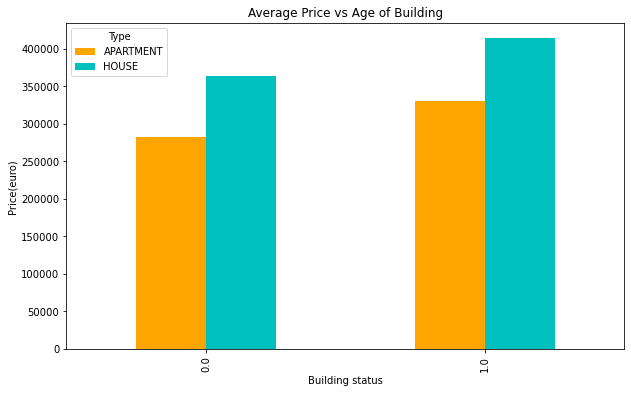

In [351]:



df.groupby(['ConstructionYear','Type'])['Price'].mean().unstack().plot(kind='bar',color={"HOUSE": "c", "APARTMENT": "orange"},
title='Average Price vs Age of Building',ylabel='Price(euro)', xlabel='Building status', figsize=(10,6))


In [349]:
# a =df.groupby(['ConstructionYear','Type'])['Price'].mean().unstack()
# a
# #.plot(kind='bar',color={"HOUSE": "c", "APARTMENT": "orange"},
# #title='Average Price vs Age of Building',ylabel='Price(euro)', xlabel='Building status', figsize=(10,6))

# Correlation
Correlation refers to the statistical relationship between two entities. In other words, it's how two variables move in relation to one another. Correlation can be used for various data sets, as well. In some cases, you might have predicted how things will correlate, while in others, the relationship will be a surprise to you. It's important to understand that correlation does not mean the relationship is causal.

To understand how correlation works, it's important to understand the following terms:
1. Positive correlation: A positive correlation would be 1. This means the two variables moved either up or down in the   same direction together.
2. Negative correlation: A negative correlation is -1. This means the two variables moved in opposite directions.
3. Zero or no correlation: A correlation of zero means there is no relationship between the two variables. In other words, as one variable moves one way, the other moved in another unrelated direction.

Types of Correlation

* Pearson correlation: The Pearson correlation is the most commonly used measurement for a linear relationship between two variables. The stronger the correlation between these two datasets, the closer it'll be to +1 or -1.
* Spearman correlation: This type of correlation is used to determine the monotonic relationship or association between two datasets. Unlike the Pearson correlation coefficient, it's based on the ranked values for each dataset and uses skewed or ordinal variables rather than normally distributed ones.
* Kendall correlation: This type of correlation measures the strength of dependence between two datasets.

In [ ]:
# correlation between price and bedroom  count
print("pearson:",df["Price"].corr(df["BedroomCount"], method="pearson"))
print("kendall:",df["Price"].corr(df["BedroomCount"], method="kendall"))
print("spearman:",df["Price"].corr(df["BedroomCount"], method="spearman"))


In [ ]:
print("price to facadecount correlaton: ", df["Price"].corr(df["FacadeCount"]))